In [45]:
import os
import numpy as np
import tensorflow as tf
import h5py
import donkeycar as dk
from donkeycar.parts.datastore import TubGroup, Tub

using donkey v2.5.1 ...


In [2]:
data_dir = os.path.expanduser('/home/wroscoe/data/diyrobocar_races/')
hf_path = os.path.expanduser('~/data/all_tubs.h5')

### READ h5 dataset

In [33]:
hf_path = os.path.expanduser('~/data/all_tubs.h5')
hf = h5py.File(hf_path, 'r')

In [34]:
hf['cam/image_array'].shape

(2621, 120, 160, 3)

In [49]:
hf.close()

In [50]:
tub_paths = ['/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_24_18-05-08',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_29_18-05-08',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_11_18-05-09',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub3_rev',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_28_18-05-08',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub6',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub20_right',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub5',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub4',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub2',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_25_18-05-08',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_9_18-05-09',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub8',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub1',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_27_18-05-08',
 '/home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub7',
 '/home/wroscoe/data/diyrobocar_races/2018-06_diyrobo_driveai/driveai_data4',
 '/home/wroscoe/data/diyrobocar_races/2018-06_diyrobo_driveai/driveai_data1',
 '/home/wroscoe/data/diyrobocar_races/2018-06_diyrobo_driveai/driveai_data3',
 '/home/wroscoe/data/diyrobocar_races/2018-06_diyrobo_driveai/driveai_data2',
 '/home/wroscoe/data/diyrobocar_races/2018-03_diyrobo_american_steel/tub_wroscoe_american_steel_3_18',
 '/home/wroscoe/data/diyrobocar_races/2018-03_diyrobo_american_steel/tub_2_18-03-17',
 '/home/wroscoe/data/diyrobocar_races/2018-03_aws_reinvent/tub_1_17-11-28',
 '/home/wroscoe/data/diyrobocar_races/2018-05_mapbox_locate/ltub2',
 '/home/wroscoe/data/diyrobocar_races/2018-05_mapbox_locate/ltub',
 '/home/wroscoe/data/diyrobocar_races/2018-08_diyrobo_american_steel/aug_oak_data2',
 '/home/wroscoe/data/diyrobocar_races/2018-08_diyrobo_american_steel/aug_oak_data3',
 '/home/wroscoe/data/diyrobocar_races/2018-08_diyrobo_american_steel/aug_oak_data3/tub',
 '/home/wroscoe/data/diyrobocar_races/2018-08_diyrobo_american_steel/aug_oak_data1',
 '/home/wroscoe/data/diyrobocar_races/2018-08_diyrobo_american_steel/aug_oak_data4',
 '/home/wroscoe/data/diyrobocar_races/2018-01_diyrobo_american_steel/tub_24_18-01-20',
 '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub_6_18-05-19',
 '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub3',
 '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub2',
 '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub_8_18-05-19',
 '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub1',
 '/home/wroscoe/data/diyrobocar_races/2018-05_sea_hackathon/tub_seattle',
 '/home/wroscoe/data/diyrobocar_races/2018-05_sea_hackathon/tub_1_18-05-18']

In [51]:
len(tub_paths)

38

### Save tubs to h5 dataset

In [53]:
def add_data_to_hf(hf, dataset_name, arr):
    ds = hf.get(dataset_name)
    if ds is None:
        hf.create_dataset(dataset_name, data=arr, maxshape=(None,)+arr.shape[1:])
    else:
        ds.resize((ds.shape[0] + arr.shape[0]), axis=0)
        ds[-arr.shape[0]:] = arr
        
        
    

In [54]:
import h5py
os.remove(hf_path)
hf = h5py.File(hf_path, 'w')

row_count = []

for path in tub_paths:
    
    print('starting: {}'.format(path))
    tub = Tub(path)
    data_dict = next(tub.get_batch_gen(batch_size = len(tub.get_index())))
    
    img = data_dict['cam/image_array']
    ang = data_dict['user/angle']
    thr = data_dict['user/throttle']
    #print()
    
    #z = np.concatenate((img, ang, thr), axis=2)
    
    assert len(set([img.shape[0], ang.shape[0], thr.shape[0]])) == 1 
    row_count.append(img.shape[0])
    
    add_data_to_hf(hf, 'cam/image_array', img)
    add_data_to_hf(hf, 'user/angle', ang)
    add_data_to_hf(hf, 'user/throttle', thr)
    
    print('rows: {}'.format(img.shape))

    
print('total_rows:{}'.format(sum(row_count)))

set()

starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_24_18-05-08
rows: (9836, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_29_18-05-08
rows: (11285, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_11_18-05-09
rows: (6091, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub3_rev
rows: (3524, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/tub_28_18-05-08
rows: (2607, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub6
rows: (367, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub20_right
rows: (11285, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub5
rows: (2248, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar_races/2018-05_google_io/google_io_tub4
rows: (5650, 120, 160, 3)
starting: /home/wroscoe/data/diyrobocar

set()

In [35]:
import donkeycar

In [36]:
from donkeycar.parts.keras import KerasLinear

In [37]:
kl = KerasLinear()

In [ ]:
kl.train()

In [38]:
hf_path = os.path.expanduser('~/data/test.h5')
hf = h5py.File(hf_path, 'w')

In [39]:
grp = hf.create_group('data')

In [40]:
path = '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub3'
tub = Tub(path)
data_dict = next(tub.get_batch_gen(batch_size = len(tub.get_index())))

img = data_dict['cam/image_array']
ang = data_dict['user/angle']
thr = data_dict['user/throttle']

In [41]:
grp.create_dataset('img', data=img)

<HDF5 dataset "img": shape (9952, 120, 160, 3), type "|u1">

In [44]:
grp['img'][1].shape

(120, 160, 3)

In [45]:
grp.create_dataset('ang', data=ang)

<HDF5 dataset "ang": shape (9952,), type "<f8">

In [25]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from PIL import Image, ImageDraw
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib

from tensorflow.python.keras.layers import Input, BatchNormalization
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.layers import Convolution2D
from tensorflow.python.keras.layers import Dropout, Flatten, Dense

from moviepy.editor import *
import glob

import donkeybarn as barn

#location where to save datasets
data_dir = os.path.expanduser('~/donkey_data')

print(barn.__file__)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
/home/wroscoe/code/donkey/donkeybarn/donkeybarn/__init__.py


In [26]:
def default_linear():
    img_in = Input(shape=(120, 160, 3), name='img_in')
    x = img_in

    # Convolution2D class name is an alias for Conv2D
    x = BatchNormalization()(x)
    x = Convolution2D(filters=16, kernel_size=(5, 5), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=24, kernel_size=(5, 5), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=32, kernel_size=(5, 5), strides=(2, 2), activation='relu')(x)
    x = Convolution2D(filters=64, kernel_size=(3, 3), strides=(2, 2), activation='relu')(x)

    x = Flatten(name='flattened')(x)
    x = Dense(units=100, activation='linear')(x)
    x = Dropout(rate=.1)(x)
    x = Dense(units=50, activation='linear')(x)
    x = Dropout(rate=.1)(x)
    # categorical output of the angle
    angle_out = Dense(units=1, activation='linear', name='angle_out')(x)

    # continous output of throttle
    throttle_out = Dense(units=1, activation='linear', name='throttle_out')(x)

    model = Model(inputs=[img_in], outputs=[angle_out, throttle_out])

    model.compile(optimizer='adam',
                  loss={'angle_out': 'mean_squared_error',
                        'throttle_out': 'mean_squared_error'},
                  loss_weights={'angle_out': 0.5, 'throttle_out': .5})

    return model

In [3]:
hf_path = os.path.expanduser('/home/wroscoe/data/all_tubs_safe.h5')
hf = h5py.File(hf_path, 'r')

In [4]:
X = hf['cam/image_array'][:]
ang = hf['user/angle'][:]
thr = hf['user/throttle'][:]

In [29]:
np.random.seed(42)
np.random.shuffle(X)
np.random.seed(42)
np.random.shuffle(ang)
np.random.seed(42)
np.random.shuffle(thr)

In [22]:
np.random.seed(42)
a = np.array([[1,1], [2,2], [3,3], [4,4]])
b = np.array([1,2,3,4])

np.random.shuffle(a)
np.random.shuffle(b)
print(a)
print(b)

[[2 2]
 [4 4]
 [1 1]
 [3 3]]
[2 4 1 3]


In [40]:
hf_path = os.path.expanduser('/home/wroscoe/data/all_tubs_shuffled.h5')
hf2 = h5py.File(hf_path, 'w')
hf2.create_dataset('cam/image_array', data=X)
hf2.create_dataset('user/angle', data=ang)
hf2.create_dataset('user/throttle', data=thr)
hf2.close()

In [30]:
Y = {'angle_out': ang, 'throttle_out': thr}
model = default_linear()

In [31]:
model.fit(X, Y, epochs=1, validation_split=.2, batch_size=256)

Train on 227789 samples, validate on 56948 samples
Epoch 1/1
227789/227789 [==============================] - 76s 334us/step - loss: 0.0354 - angle_out_loss: 0.0504 - throttle_out_loss: 0.0204 - val_loss: 0.0229 - val_angle_out_loss: 0.0322 - val_throttle_out_loss: 0.0137


In [41]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
def train(model, X, Y, saved_model_path, epochs=100, 
          min_delta=.0005, patience=3, use_early_stop=True):
    
    # checkpoint to save model after each epoch
    save_best = ModelCheckpoint(saved_model_path,
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True,
                                mode='min')

    # stop training if the validation error stops improving.
    early_stop = EarlyStopping(monitor='val_loss',
                               min_delta=min_delta,
                               patience=patience,
                               verbose=1,
                               mode='auto')

    callbacks_list = [save_best]

    if use_early_stop:
        callbacks_list.append(early_stop)

    hist = model.fit(
        X, Y,
        validation_split=.1,
        epochs=epochs,
        verbose=1,
        callbacks=callbacks_list)
    return hist

In [42]:
model_path = os.path.expanduser('/home/wroscoe/data/base_model.h5')

In [43]:
train(model, X, Y, saved_model_path=model_path)

Train on 256263 samples, validate on 28474 samples
Epoch 1/100
256263/256263 [==============================] - 73s 285us/step - loss: 0.0170 - angle_out_loss: 0.0243 - throttle_out_loss: 0.0096 - val_loss: 0.0158 - val_angle_out_loss: 0.0229 - val_throttle_out_loss: 0.0088

Epoch 00001: val_loss improved from inf to 0.01584, saving model to /home/wroscoe/data/base_model.h5
Epoch 2/100
256263/256263 [==============================] - 71s 276us/step - loss: 0.0158 - angle_out_loss: 0.0225 - throttle_out_loss: 0.0092 - val_loss: 0.0166 - val_angle_out_loss: 0.0242 - val_throttle_out_loss: 0.0090

Epoch 00002: val_loss did not improve from 0.01584
Epoch 3/100
256263/256263 [==============================] - 73s 284us/step - loss: 0.0151 - angle_out_loss: 0.0213 - throttle_out_loss: 0.0090 - val_loss: 0.0150 - val_angle_out_loss: 0.0212 - val_throttle_out_loss: 0.0088

Epoch 00003: val_loss improved from 0.01584 to 0.01498, saving model to /home/wroscoe/data/base_model.h5
Epoch 4/100
25626

### Test the performance of the base model

In [74]:
path = '/home/wroscoe/data/diyrobocar_races/2018-05_san_mateo_maker_faire/tub3'
tub = Tub(path)
data_dict = next(tub.get_batch_gen(batch_size = len(tub.get_index())))

img = data_dict['cam/image_array']
ang = data_dict['user/angle']
thr = data_dict['user/throttle']

In [75]:
model = tf.keras.models.load_model('/home/wroscoe/data/base_model.h5')


In [84]:
yp = model.predict(img[500:550])
ang.shape

(9952,)

In [77]:
%matplotlib inline

In [78]:
from matplotlib import pyplot as plt

In [79]:
yp[0].shape

(50, 1)

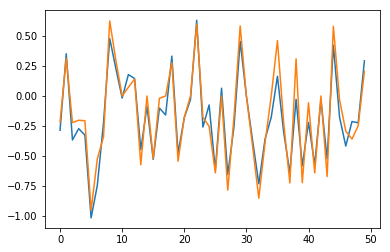

In [86]:
plt.plot(yp[0])
plt.plot(ang[500:550])

### Train for a new track starting with the base model

In [47]:
img.shape

(9952, 120, 160, 3)